<a href="https://colab.research.google.com/github/leonaardoas/Projeto-TCC/blob/main/2_LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BIBLIOTECAS**

In [ ]:
pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.1
    Uninstalling ml-dtypes-0.3.1:
      Successfully uninstalled ml-dtyp

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import keras.utils as image
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, f1_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras import layers, models
from keras.utils import to_categorical



**VETORIZANDO RÓTULOS**




In [ ]:
labels = ['Hid', 'Rot', 'Vel', 'Conc', 'Ext', 'Perf', 'SF']

with open('/content/drive/MyDrive/TCC - Leonardo/4 - Rótulos/4 - Rotulos.csv', 'r') as file:
    examples = file.readlines()
    labels_all = []
    for line_num, ex in enumerate(examples, start=1):
        if line_num == 1:  # Pular a primeira linha
            continue
        label_vec = [0] * len(labels)
        for label in labels:
            if any(label in ex for label in labels):
                if label in ex:
                    idx = labels.index(label)
                    label_vec[idx] = 1
        labels_all.append(label_vec)

#print(f'labels: {labels}')
#print(labels_all)

df = pd.DataFrame(labels_all)
dfy = df.drop(columns =2, axis=1)
df1 = pd.read_csv('/content/drive/MyDrive/TCC - Leonardo/4 - Rótulos/4 - Rotulos.csv').drop(columns=['1','2', '3', '4', '5', '6', '7', '8'])
df2 = pd.concat([df1, df], axis=1)
df3 = df2.drop(columns=2, axis=1)
df3



**N.º RELATÓRIOS COM FALHA POR PARÂMETRO**

In [ ]:
parametros = ['Hid', 'Rot', 'Vel', 'Conc', 'Ext', 'PE', 'SF']
falhas = [df2[0].value_counts()[1],
          df2[1].value_counts()[1],
          df2[2].value_counts(normalize=True).get(1, 0),
          df2[3].value_counts()[1],
          df2[4].value_counts()[1],
          df2[5].value_counts()[1],
          df2[6].value_counts()[1]]

plt.bar(parametros, falhas, color = 'black')

plt.title('Falhas gráficas')
plt.xlabel('Parâmetros')
plt.ylabel('Número de falhas')
plt.show()

**TRATAMENTO DAS IMAGENS**

In [ ]:
image_directory = '//content/drive/MyDrive/TCC - Leonardo/3 - Dataset'


X_dataset = []
for i in tqdm(range(df.shape[0])):
    img = image.load_img(image_directory+'/' +df3['filename'][i], target_size=(32,32,3))
    img = image.img_to_array(img)
    img = img/255.
    X_dataset.append(img)

X = np.array(X_dataset)
y = np.array(dfy)



**TREINO, VALIDAÇÃO E TESTE**

In [ ]:
# Perform a stratified train-test split
X_train_, X_test, y_train_, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_, y_train_, random_state = 20, test_size = 0.2)

# Check the class distribution in the training and testing datasets
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

print("Training class distribution:")
for cls, count in zip(unique_train, counts_train):
    print(f"Class {cls}: {count} samples")

print("\nTesting class distribution:")
for cls, count in zip(unique_test, counts_test):
    print(f"Class {cls}: {count} samples")

Training class distribution:
Class 0: 13595 samples
Class 1: 2932 samples

Testing class distribution:
Class 0: 4258 samples
Class 1: 908 samples


## **LeNet - Redes Neurais Convolucionais**

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.layers import AveragePooling2D


In [ ]:
EPOCHS = 10

model = Sequential([
    Conv2D(filters=6, kernel_size=(5, 5), strides=(1,1), padding='valid', activation='tanh', input_shape=(32,32,3)),
    AveragePooling2D(pool_size= (2, 2), strides=(2,2), padding='valid'),

    Conv2D(filters=16, kernel_size=(5, 5), strides=(1,1), padding='valid', activation='tanh'),
    AveragePooling2D(pool_size= (2, 2), strides=(2,2), padding='valid'),

    Flatten(),

    Dense(units=120, activation='tanh'),
    Dense(units=84, activation='tanh'),
    Dense(units=6, activation = 'sigmoid')])

model.summary()
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

checkpoint_path = "best_model.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only = True,
                                                 verbose=1)

model.fit(X_train_, y_train_, epochs= EPOCHS, validation_data=( X_val, y_val), batch_size=64, callbacks=[cp_callback])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

**PREVISÃO DO MODELO**

In [ ]:
#from pandas.io.formats.printing import PrettyDict
pdc = model.predict(X_test)

# Create an array of thresholds to try
thresholds = np.arange(0.1, 1.0, 0.1)  # Adjust the range and step size as needed

best_f1 = 0
best_threshold = 0
y_pred,y_true = pdc, y_test
# Iterate over each threshold and calculate F1-score
for threshold in thresholds:
    y_pred_binary = (y_pred > threshold).astype(int)
    f1 = f1_score(y_true, y_pred_binary, average='micro')

    # Update the best F1-score and threshold if a higher F1-score is found
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

# Print the best threshold and corresponding F1-score
print('Best Threshold:', best_threshold)
print('Best F1-score:', best_f1)

y_binary = (pdc > best_threshold).astype(int)
print(y_binary)
print(len(y_binary),len(y_binary[0]))

24/24 [==============================] - 0s 7ms/step
Best Threshold: 0.4
Best F1-score: 0.9309773605742684
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
738 7


##**MÉTRICAS**

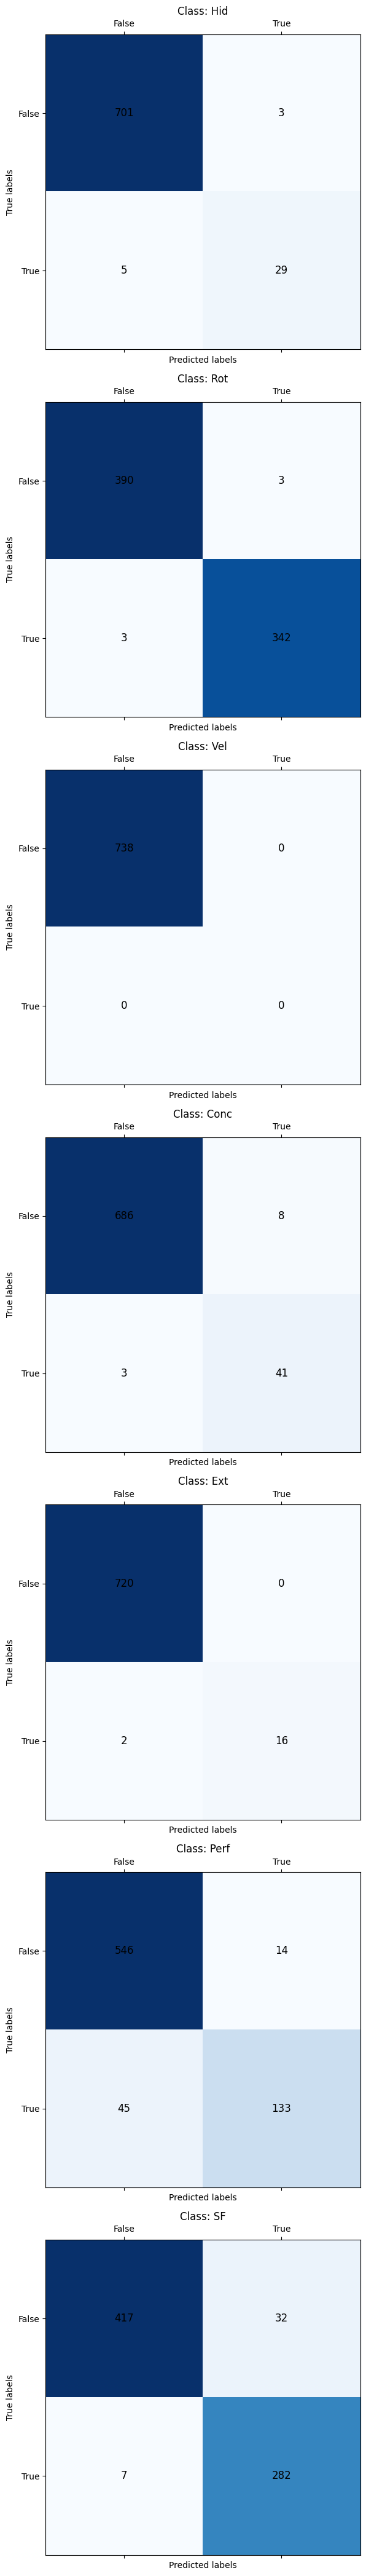

In [ ]:
# Assuming you have the ground truth labels stored in y_true and the predicted labels in y_pred

# Compute the multilabel confusion matrix
cm = multilabel_confusion_matrix(y_true, y_binary)

# Plot the confusion matrix
num_classes = cm.shape[0]
fig, axes = plt.subplots(num_classes, figsize=(8, 6 * num_classes))
for i, ax in enumerate(axes):
    ax.matshow(cm[i], cmap=plt.cm.Blues)
    ax.set_title('Class: '+labels[i])
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['False', 'True'])
    ax.set_yticklabels(['False', 'True'])
    for (j, k), value in np.ndenumerate(cm[i]):
        ax.text(k, j, f'{value}', ha='center', va='center', fontsize=12)



plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_binary,target_names=labels))

              precision    recall  f1-score   support

         Hid       0.91      0.85      0.88        34
         Rot       0.99      0.99      0.99       345
         Vel       0.00      0.00      0.00         0
        Conc       0.84      0.93      0.88        44
         Ext       1.00      0.89      0.94        18
        Perf       0.90      0.75      0.82       178
          SF       0.90      0.98      0.94       289

   micro avg       0.93      0.93      0.93       908
   macro avg       0.79      0.77      0.78       908
weighted avg       0.93      0.93      0.93       908
 samples avg       0.94      0.94      0.93       908



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
